# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [4]:

# 請嘗試設定 GPU：os.environ
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
## 超參數設定
"""
Set your required experiment parameters
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
optimizerNames=['AdaGrad','SGD','RMSprop','Adam']
MOMENTUM = 0.5

In [20]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料

### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam
"""

for lr in LEARNING_RATE:
    for optimizerName in optimizerNames:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f and %s" % (lr,optimizerName))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        if optimizerName=='SGD':
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
        elif optimizerName=='RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif optimizerName=='AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        elif optimizerName=='Adam':
            optimizer = keras.optimizers.Adam(lr=lr)
        else:
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
            
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s-%s" % (str(lr), optimizerName)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.100000 and AdaGrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [================

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 359us/step - loss: 14.4454 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 17s 339us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 17s 335us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 17s 337us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 17s 334us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 17s 337us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 17s 338us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 15s 302us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 15s 299us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 15s 302us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/10
50000/50000 [==============================] - 15s 291us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/10
50000/50000 [==============================] - 14s 284us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/10
50000/50000 [==============================] - 14s 283us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000 and Adam
_________________________________________________________________
Layer (type)                 Output Shape              Para

50000/50000 [==============================] - 10s 207us/step - loss: 1.8491 - acc: 0.3562 - val_loss: 1.8471 - val_acc: 0.3542
Experiment with LR = 0.001000 and RMSprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 205us/step - loss: 2.3314 - acc: 0.0924 - val_loss: 2.2986 - val_acc: 0.1015
Epoch 2/10
50000/50000 [==============================] - 9s 186us/step - loss: 2.2866 - acc: 0.1260 - val_loss: 2.2764 - val_acc: 0.1386
Epoch 3/10
50000/50000 [==============================] - 10s 190us/step - loss: 2.2678 - acc: 0.1553 - val_loss: 2.2595 - val_acc: 0.1653
Epoch 4/10
50000/50000 [==============================] - 9s 186us/step - loss: 2.2520 - acc: 0.1762 - val_loss: 2.2446 - val_acc: 0.1814
Epoch 5/10
50000/50000 [==============================] - 10s 192us/step - loss: 2.2377 - acc: 0.1908 - val_loss: 2.2309 - val_acc: 0.1956
Epoch 6/10
50000/50000 [==============================] - 9s 190us/step - loss: 2.2243 - acc: 0.2045 - val_loss: 2.2177 - val_acc: 0.2079
Epoch 7/10
50000/50000 [==============================] - 9s 190us/step - loss: 2.2114 - acc: 0.2148 - val_loss: 2.2049

50000/50000 [==============================] - 13s 266us/step - loss: 2.1466 - acc: 0.2508 - val_loss: 2.1404 - val_acc: 0.2526
Epoch 6/10
50000/50000 [==============================] - 13s 263us/step - loss: 2.1333 - acc: 0.2557 - val_loss: 2.1284 - val_acc: 0.2587
Epoch 7/10
50000/50000 [==============================] - 13s 263us/step - loss: 2.1220 - acc: 0.2610 - val_loss: 2.1182 - val_acc: 0.2610
Epoch 8/10
50000/50000 [==============================] - 13s 263us/step - loss: 2.1124 - acc: 0.2649 - val_loss: 2.1094 - val_acc: 0.2648
Epoch 9/10
50000/50000 [==============================] - 13s 266us/step - loss: 2.1039 - acc: 0.2690 - val_loss: 2.1014 - val_acc: 0.2690
Epoch 10/10
50000/50000 [==============================] - 13s 264us/step - loss: 2.0963 - acc: 0.2719 - val_loss: 2.0944 - val_acc: 0.2691
Experiment with LR = 0.000010 and SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_

50000/50000 [==============================] - 17s 332us/step - loss: 1.6640 - acc: 0.4240 - val_loss: 1.6594 - val_acc: 0.4181


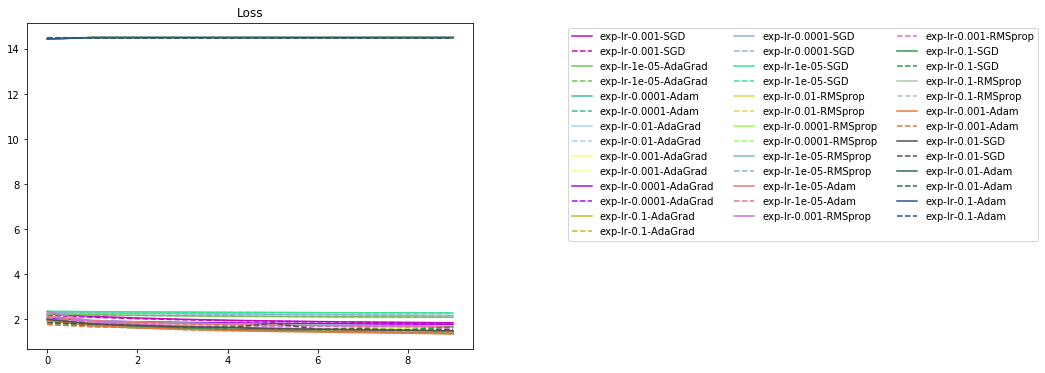

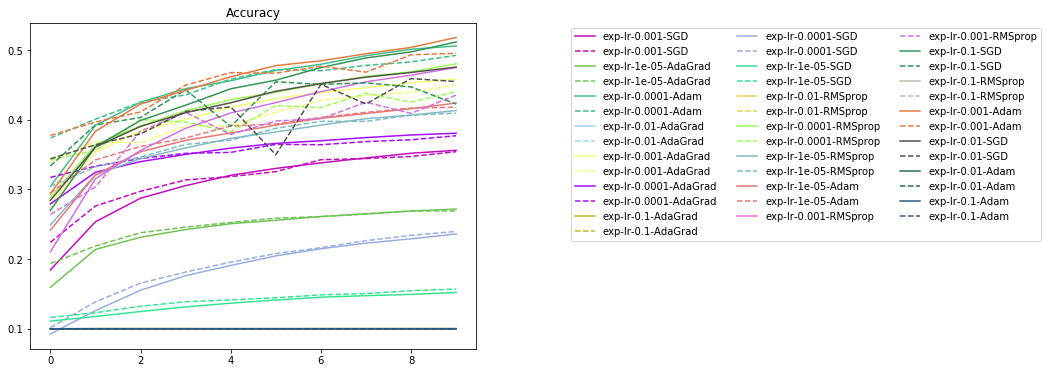

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""



color_bar = ["#c30abe",
"#6fc355",
"#41bd8c",
"#a2d4f9",
"#f4ff78",
"#a50afd",
"#c9b423",
"#98ade2",
"#33e691",
"#e7d251",
"#9bfc55",
"#82bac4",
"#e67876",
"#d170e4",
"#349456",
"#b2c3b1",
"#e7793f",
"#535149",
"#2a6b5c",
"#2b5783"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc = 'right center', bbox_to_anchor=(1,1),ncol=3)
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc = 'right center', bbox_to_anchor=(1,1),ncol=3)
plt.show()
